In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/spam.csv.csv', encoding='latin1')


In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
#1.Data Cleaning
#2.EDA
#3. Text Preprocessing
#4. Model Building
#5.Evluation
#6 Evaluation
#7.Website
#8.Deploy

#1.Data Cleaning


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.head(2)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [ ]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [ ]:
df.head(2)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
df['target']=encoder.fit_transform(df['target'])

In [ ]:
df.head(2)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


In [ ]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
df=df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

#2.EDA


In [ ]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

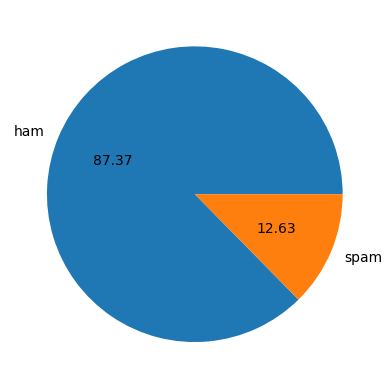

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_characters']=df['text'].apply(len)

In [ ]:
df.head(2)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29


In [ ]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head(2)

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8


In [ ]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head(2)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

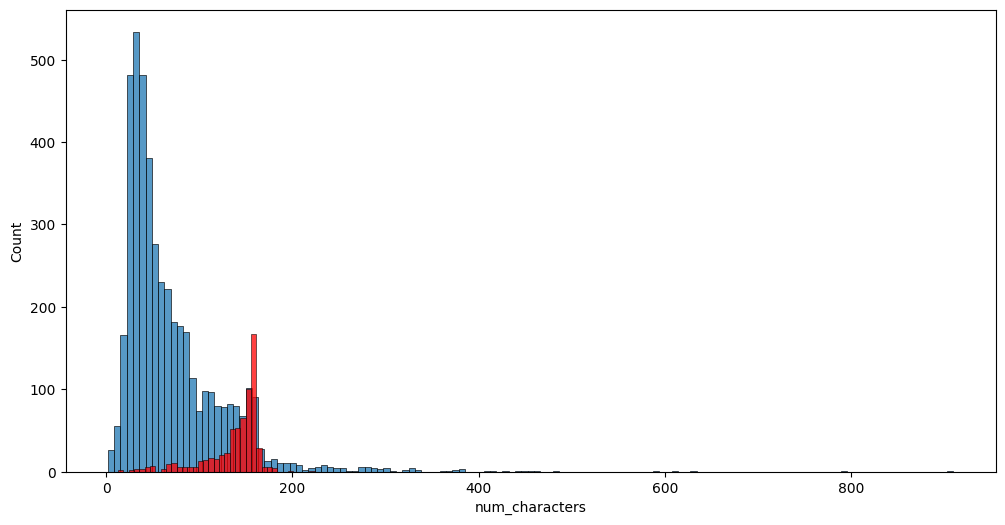

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

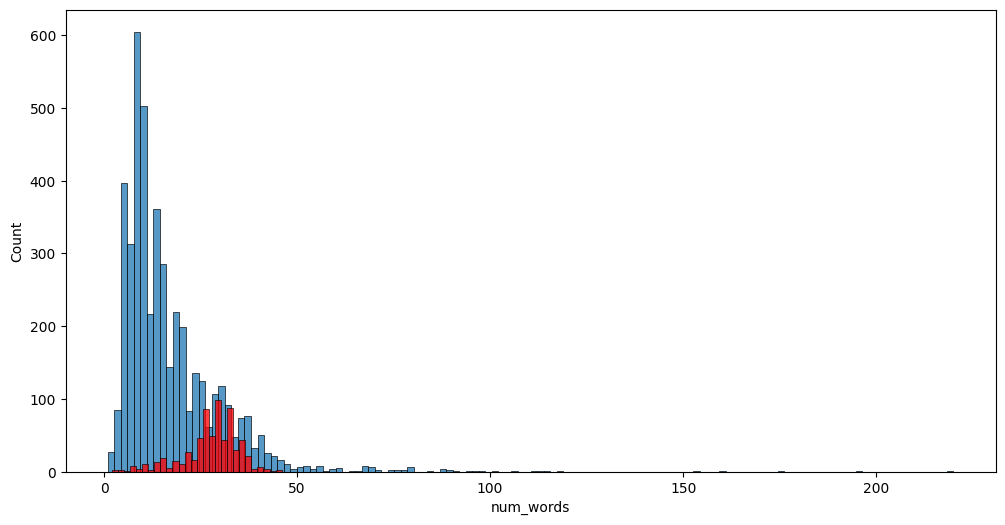

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

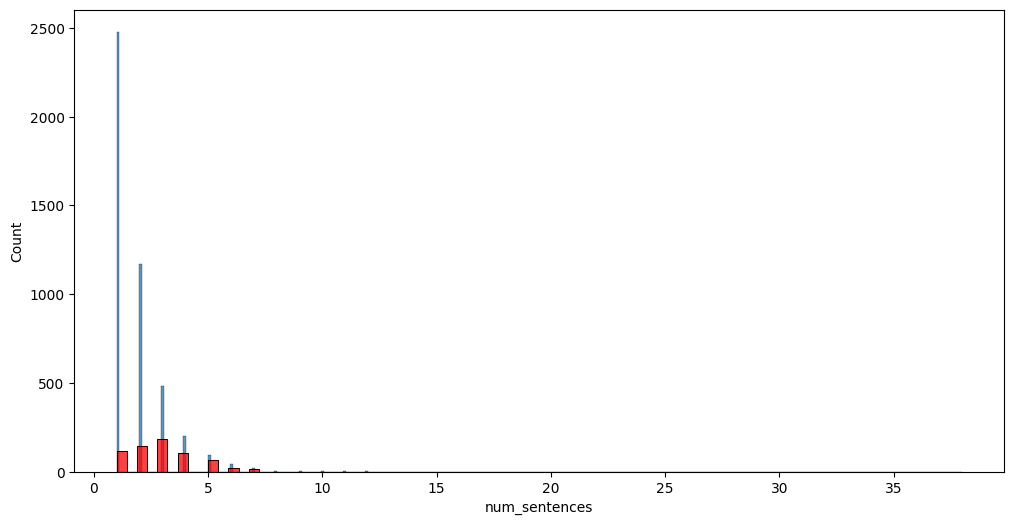

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

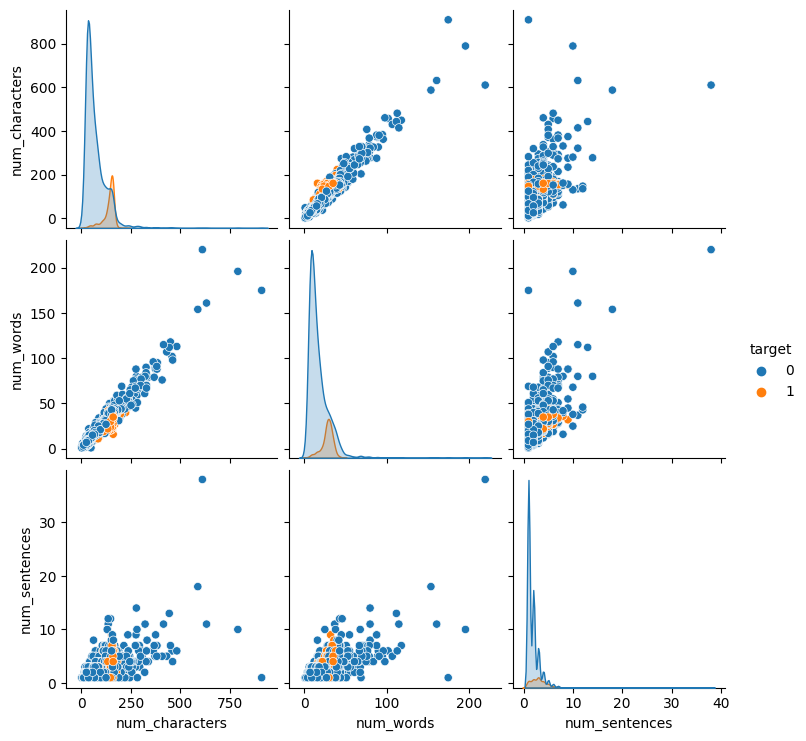

In [ ]:
sns.pairplot(df,hue='target')

<ipython-input-41-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

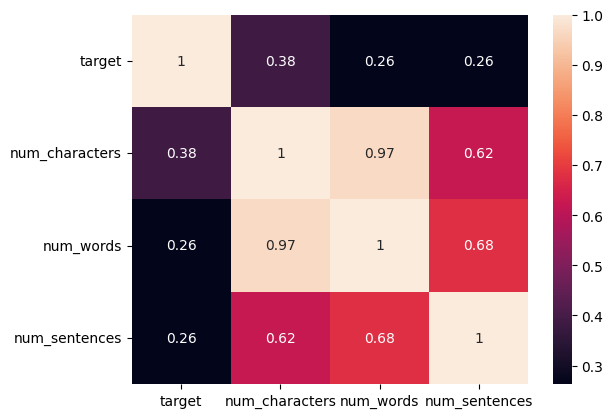

In [ ]:
sns.heatmap(df.corr(),annot=True)

#3.Text Preprocessing

. Lower case
. Tokenize
. Removing special characters
. Removing stop words and punctuations
. stemming


In [ ]:
import nltk

In [ ]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
ps=PorterStemmer()


In [ ]:
def transform_text(text):
  text=text.lower()
  text= nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)

In [ ]:
transform_text("I loved the youtube lectures on ML,how about you?")

'love youtub lectur ml'

In [ ]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [ ]:
df['transformed_text']=df['text'].apply(transform_text)

In [ ]:
df.head(2)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [ ]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

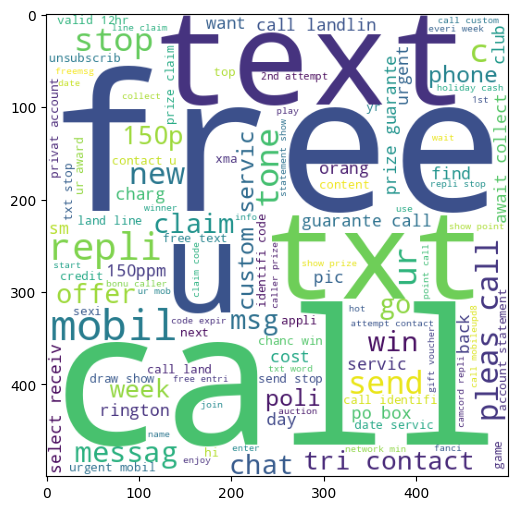

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

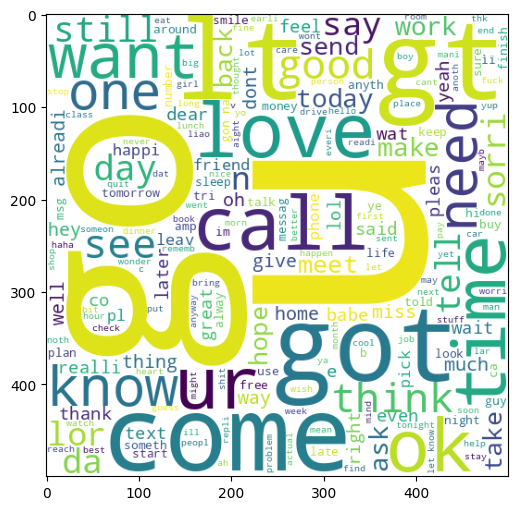

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)


In [ ]:
len(spam_corpus)

9939

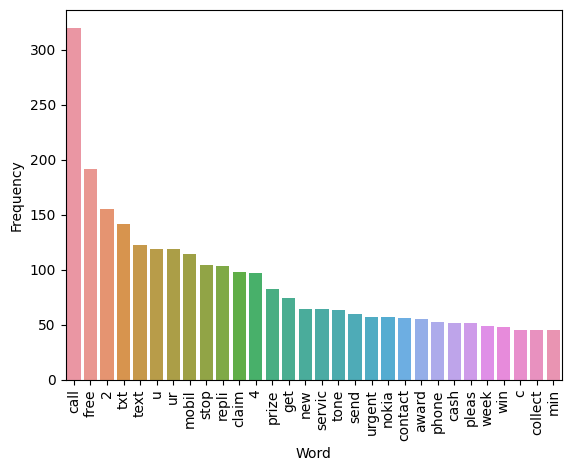

In [ ]:

from collections import Counter
# Create a DataFrame from the Counter's most_common(30) result
spam_words_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

# Use sns.barplot with x and y parameters
sns.barplot(x='Word', y='Frequency', data=spam_words_df)
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35404

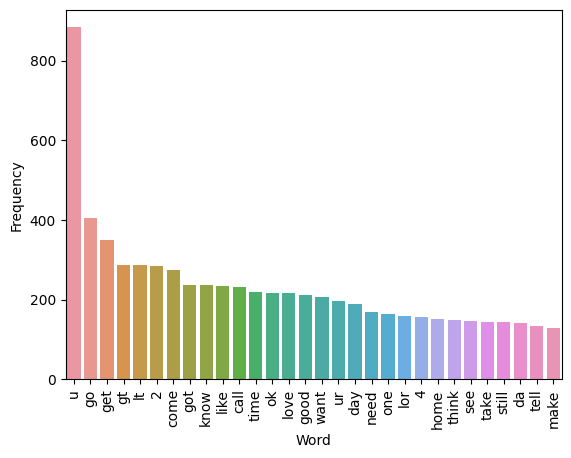

In [ ]:
from collections import Counter
# Create a DataFrame from the Counter's most_common(30) result
ham_words_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])

# Use sns.barplot with x and y parameters
sns.barplot(x='Word', y='Frequency', data=ham_words_df)
plt.xticks(rotation='vertical')
plt.show()

4.Model Building


In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [ ]:
x=tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
x.shape

(5169, 3000)

In [ ]:
y=df['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [ ]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [ ]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
import pickle
pickle.dump(tfidf,open('vectroizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [ ]:
import sklearn

print("Scikit-learn version:", sklearn.__version__)


Scikit-learn version: 1.2.2
